## Introduction

Data visualisations of the given theories are included within the report which are also included in a Jupyter Notebook attached to this assignment.

### Learning Objective 01

In this section, I will use the dataset sourced from Kaggle, ‘Student Mental Health’ (Islam, n.d.), which focuses on students and their mental health. My aim is to create a visual comparison across each subject's average performance (CGPA) results between male and female students.

#### Figure 01. Table Format of Average CGPA by Course and Gender

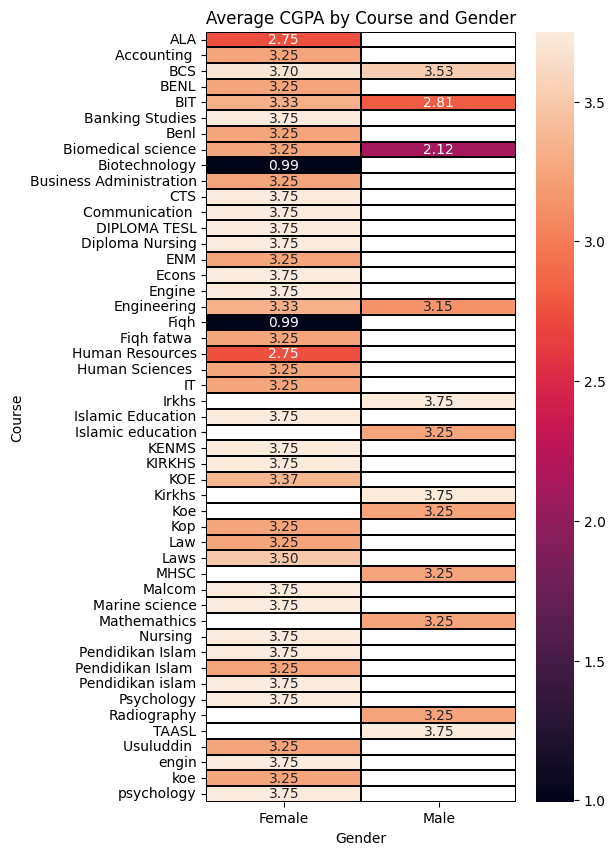

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv('datasets/StudentsMentalHealth/stud_men_health.csv')

# parse CGPA ranges
def parse_cgpa_range(cgpa_range):
    # removing whitespace and split by '-'
    b = cgpa_range.strip().split('-')
    
    # checking for range
    if len(b) == 2:
        return (float(b[0]) + float(b[1])) / 2
    return float(b[0])

# creating a column for average
df['avg'] = df['What is your CGPA?'].apply(parse_cgpa_range)

# calculate the average per gender and course
avg_per_sub_gen = df.groupby(['Choose your gender', 'What is your course?']).agg({'avg': 'mean'}).reset_index()

# pivot table for better visualisation
table = avg_per_sub_gen.pivot(index="What is your course?", columns="Choose your gender", values="avg")

# plotting table visual
plt.figure(figsize = (5, 10))
sns.heatmap(table, annot=True, fmt=".2f", cbar=True, linewidths=0.3, linecolor='black') 
plt.grid(color='none', linewidth=1)

plt.title('Average CGPA by Course and Gender')
plt.xlabel('Gender')
plt.ylabel('Course')

plt.show()



#### Figure 02. Pyramid Chart of the Differences of CGPA

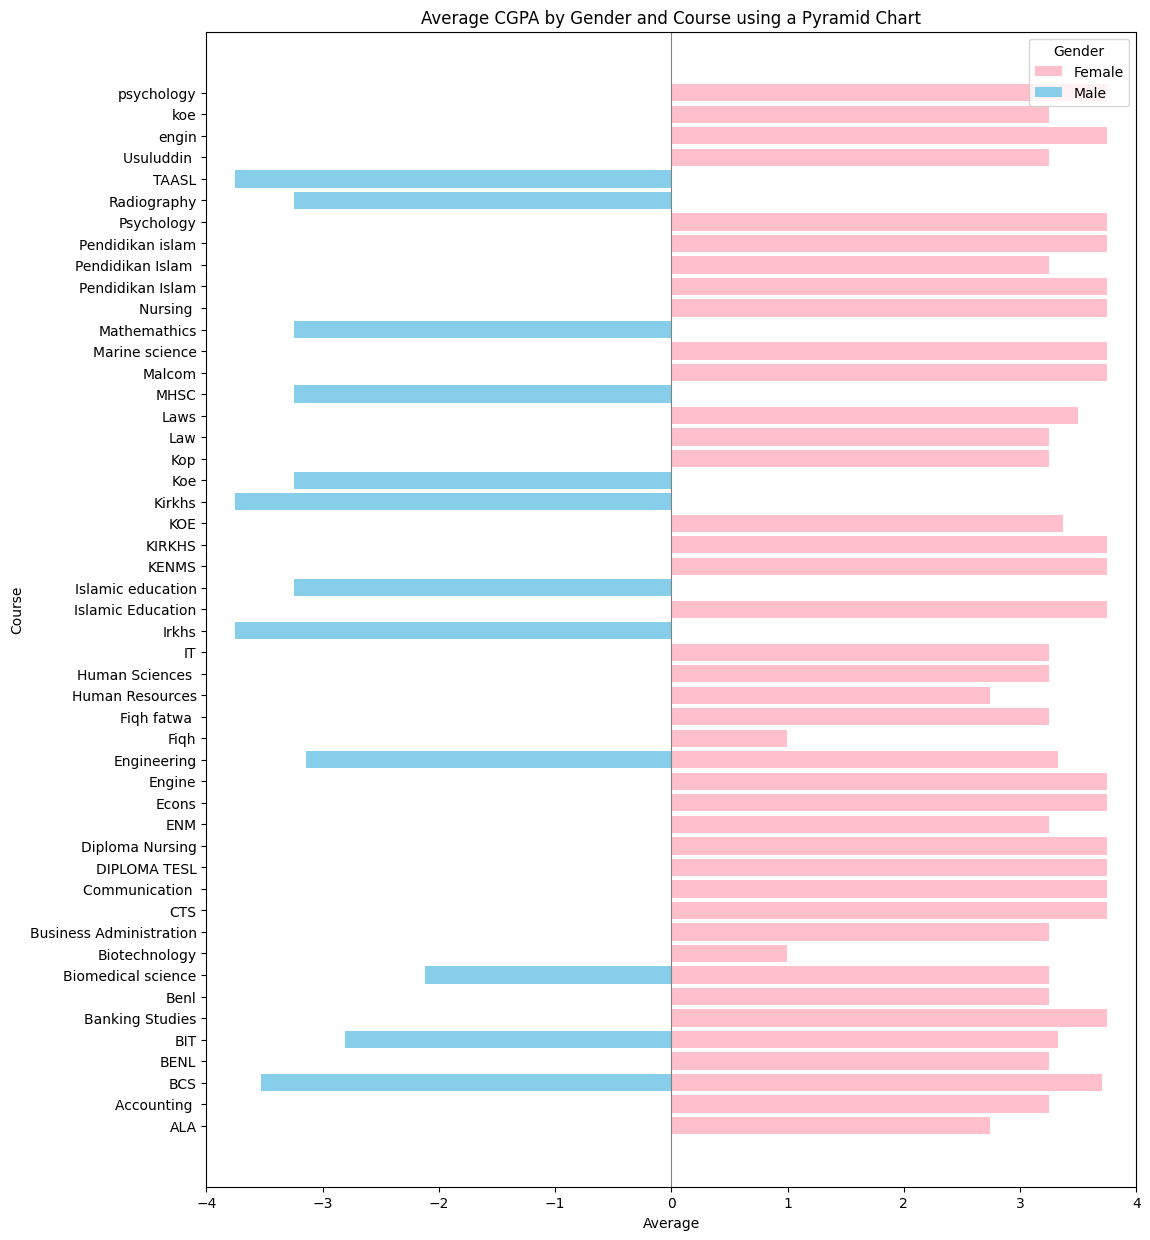

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('datasets/StudentsMentalHealth/stud_men_health.csv')

# parse CGPA ranges
def parse_cgpa_range(cgpa_range):
    # removing whitespace and split by '-'
    b = cgpa_range.strip().split('-')
    
    # checking for range
    if len(b) == 2:
        return (float(b[0]) + float(b[1])) / 2
    return float(b[0])

# creating a column for average
df['avg'] = df['What is your CGPA?'].apply(parse_cgpa_range)

# calculate the average per gender and course
avg_per_sub_gen = df.groupby(['Choose your gender', 'What is your course?']).agg({'avg': 'mean'}).reset_index()

# pivot table for better visualisation
table = avg_per_sub_gen.pivot(index="What is your course?", columns="Choose your gender", values="avg")

# reverse  male values for pyramid chart
table['Male'] = -table['Male']

# plotting the pyramid chart visual
plt.figure(figsize = (12, 15))

plt.barh(table.index, table['Female'], color='pink', label='Female')
plt.barh(table.index, table['Male'], color='skyblue', label='Male')
plt.xlim(-4, 4)

plt.title('Average CGPA by Gender and Course using a Pyramid Chart')
plt.xlabel('Average')
plt.ylabel('Course')

plt.axvline(0, color='grey', linewidth=0.8) # separate genders
plt.legend(title='Gender', loc='upper right')

plt.show()


#### Figure 03. Hybrid Chart between Lollipop and Pyramid Chart

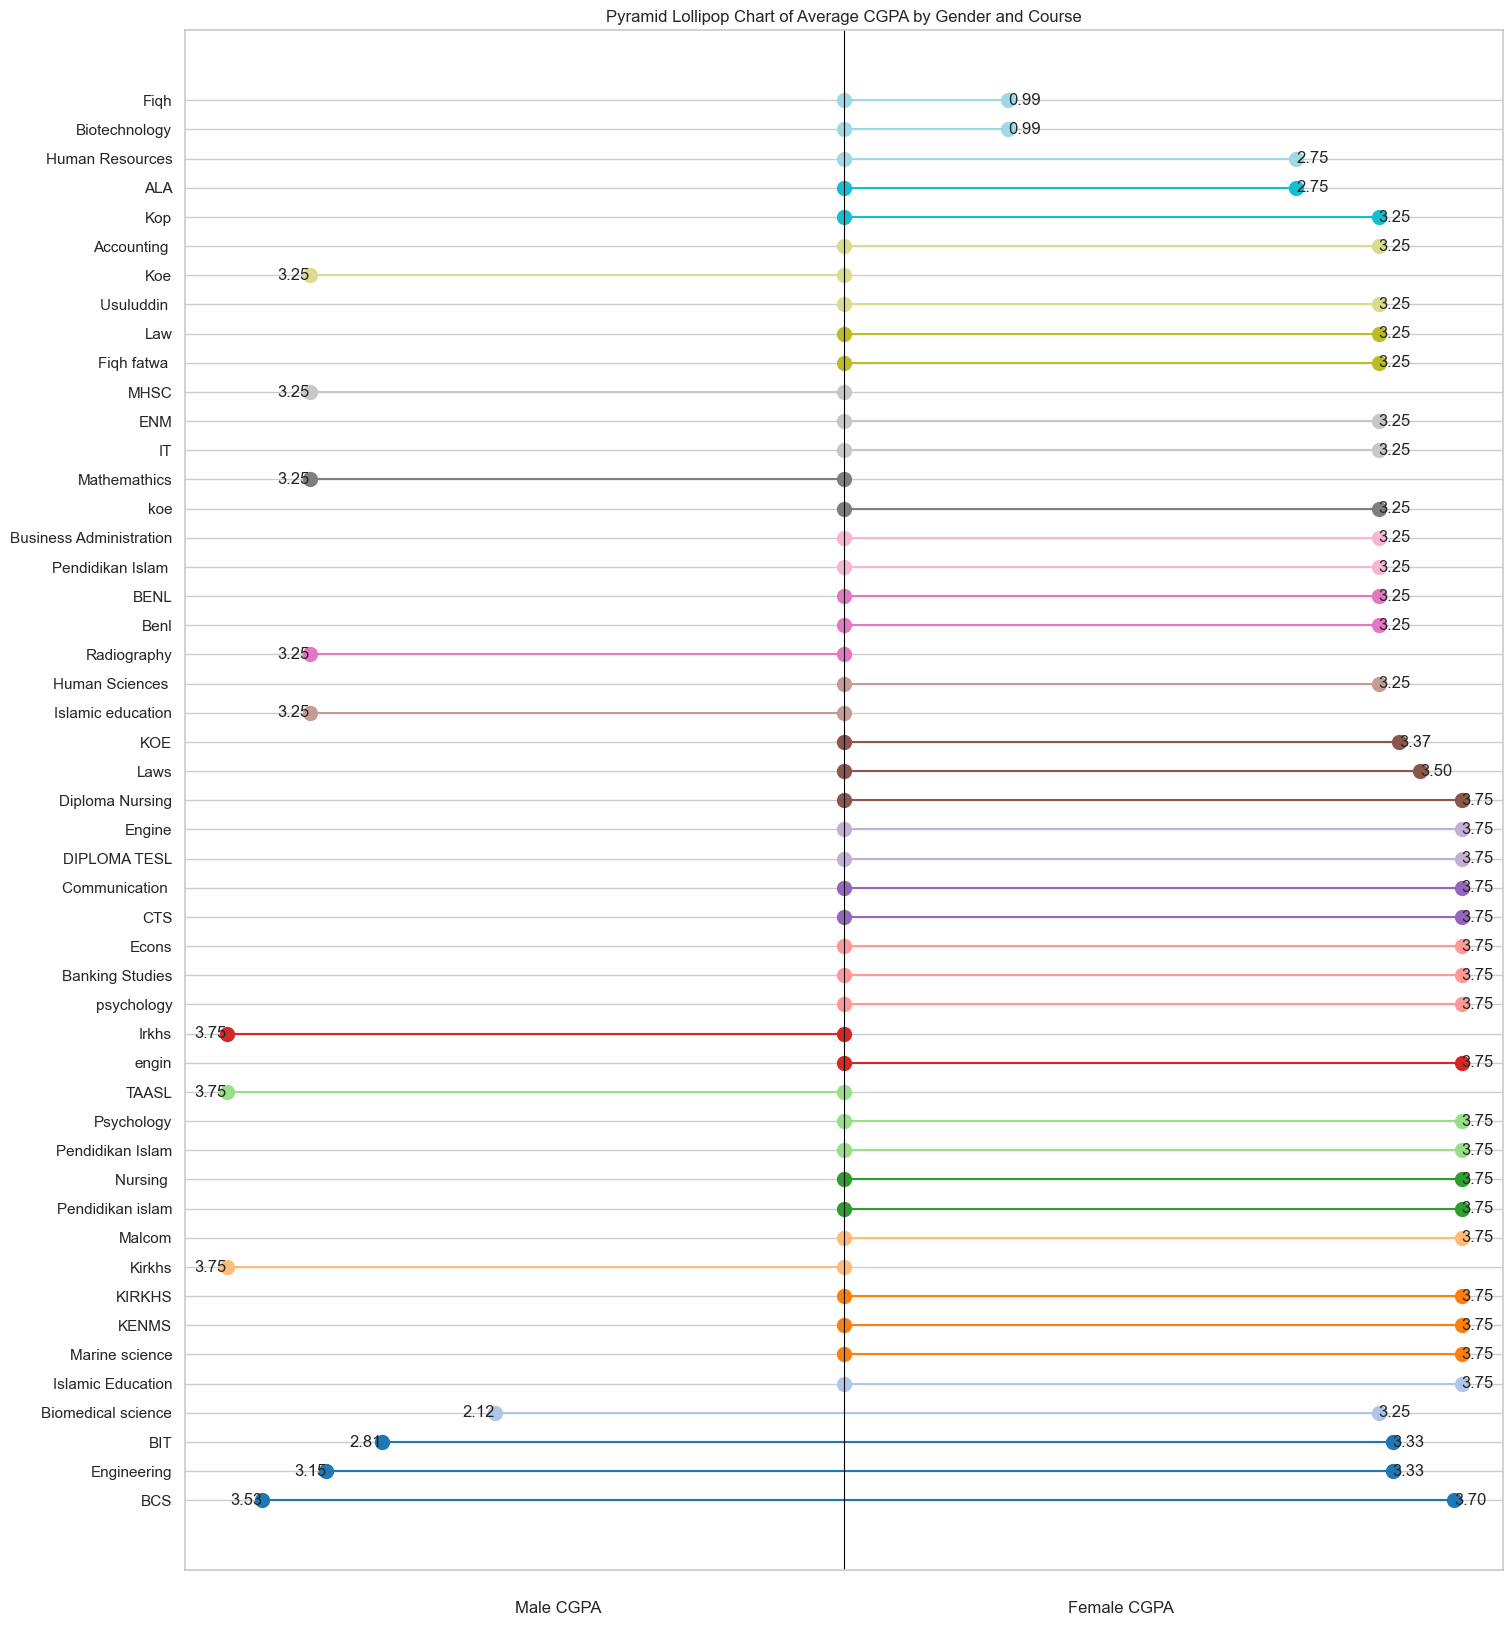

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('datasets/StudentsMentalHealth/stud_men_health.csv')

# parse CGPA ranges
def parse_cgpa_range(cgpa_range):
    # removing whitespace and split by '-'
    b = cgpa_range.strip().split('-')
    
    # checking for range
    if len(b) == 2:
        return (float(b[0]) + float(b[1])) / 2
    return float(b[0])

# creating a column for average
df['avg'] = df['What is your CGPA?'].apply(parse_cgpa_range)

# calculate the avg per gender and course
avg_per_sub_gen = df.groupby(['Choose your gender', 'What is your course?']).agg({'avg': 'mean'}).reset_index()

# pivot table
table = avg_per_sub_gen.pivot(index="What is your course?", columns="Choose your gender", values="avg").fillna(0)
table['combined_avg'] = table.mean(axis=1)
table = table.sort_values('combined_avg', ascending=False)

# plotting
fig, ax = plt.subplots(figsize=(17, 20))

# adding colours
colours = plt.cm.tab20(np.linspace(0, 1, table.shape[0]))

# plotting lollipops
for i, (idx, row) in enumerate(table.iterrows()):
    ax.plot([-row['Male'], row['Female']], [idx, idx], color=colours[i], marker='o', markersize=10)

    # adding labels
    if row['Female'] > 0:
        ax.text(row['Female'], idx, f"{row['Female']:.2f}", va='center', ha='left')
    if row['Male'] > 0:
        ax.text(-row['Male'], idx, f"{row['Male']:.2f}", va='center', ha='right')

ax.axvline(0, color='black', linewidth=0.8)  # separate by gender
ax.set_yticks(range(len(table)))
ax.set_yticklabels(table.index)
ax.set_title('Pyramid Lollipop Chart of Average CGPA by Gender and Course')

# place labels under the columns
ax.text(0.75, -0.02, 'Female CGPA', transform=ax.transAxes, ha='right', va='top', fontsize=12)
ax.text(0.25, -0.02, 'Male CGPA', transform=ax.transAxes, ha='left', va='top', fontsize=12)

# hiding x-axis
ax.xaxis.set_visible(False)
ax.set_xlim(-4, 4)  # CGPA ranges from 0 to 4

plt.show()


#### Figure 04. Lollipop Chart focused on Differences

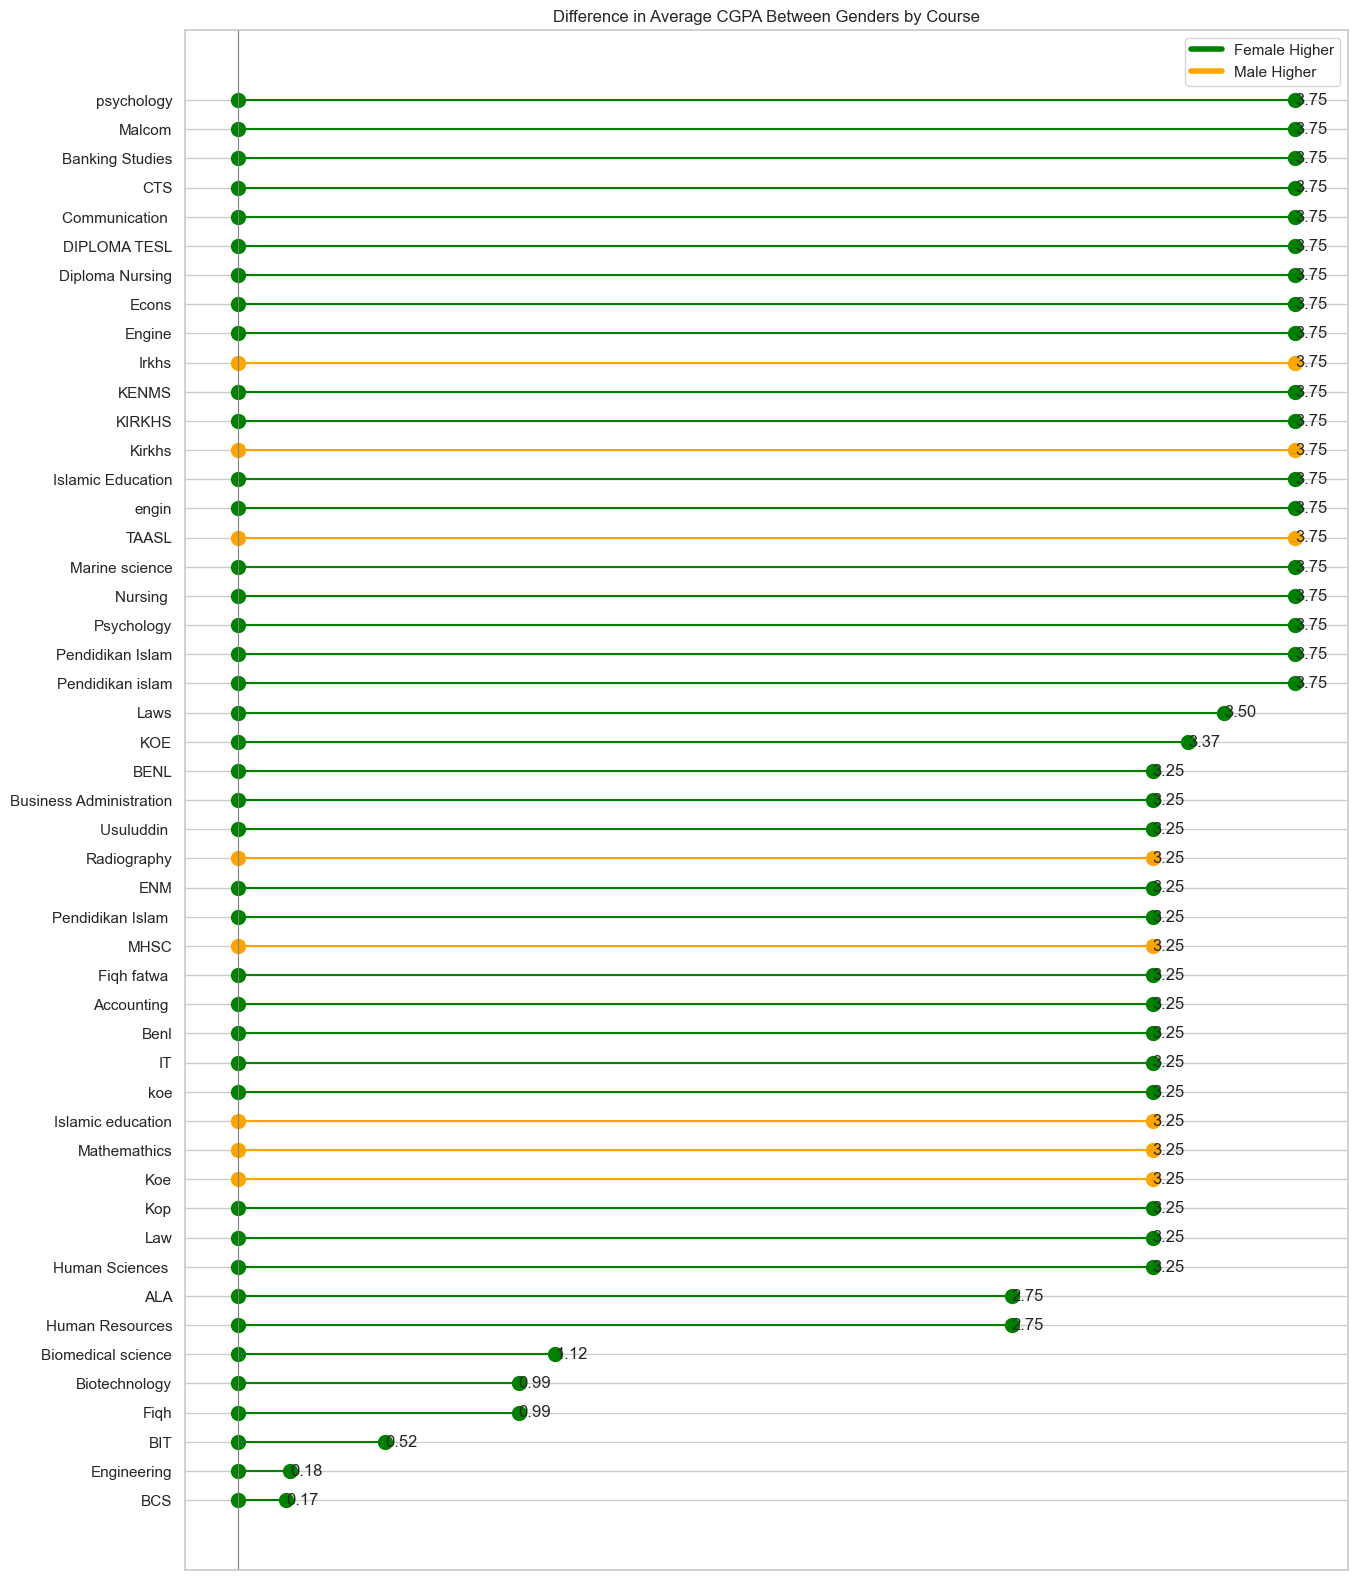

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('datasets/StudentsMentalHealth/stud_men_health.csv')

# parsing CGPA ranges
def parse_cgpa_range(cgpa_range):
    # removing whitespace and splitting by '-'
    b = cgpa_range.strip().split('-')
    
    # checking for range
    if len(b) == 2:
        return (float(b[0]) + float(b[1])) / 2
    return float(b[0])

# creating a column for average CGPA
df['avg'] = df['What is your CGPA?'].apply(parse_cgpa_range)

# average CGPA per gender and course
avg_per_sub_gen = df.groupby(['Choose your gender', 'What is your course?']).agg({'avg': 'mean'}).reset_index()

# pivot table to reformat data
table = avg_per_sub_gen.pivot(index = "What is your course?", columns = "Choose your gender", values = "avg").fillna(0)

# differences between Male & Female
table['difference'] = table['Male'] - table['Female']
table = table.sort_values(by='difference', key=abs, ascending=True)

# plotting the differences chart
fig, ax = plt.subplots(figsize = (15, 20))

# plotting lollipops for differences
for i, (idx, row) in enumerate(table.iterrows()):
    color = 'green' if row['difference'] < 0 else 'orange'
    ax.plot([0, abs(row['difference'])], [idx, idx], color  = color, marker = 'o', markersize = 10)
    ax.text(abs(row['difference']), idx, f"{abs(row['difference']):.2f}", va = 'center', ha = 'left')

ax.set_yticks(range(len(table)))
ax.set_yticklabels(table.index)
ax.set_title('Difference in Average CGPA Between Genders by Course')
ax.axvline(0, color='grey', linewidth = 0.8)  

# hide x-axis
ax.xaxis.set_visible(False)

# adding legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color = 'green', lw = 4, label = 'Female Higher'),
                   Line2D([0], [0], color = 'orange', lw = 4, label = 'Male Higher')]
ax.legend(handles=legend_elements, loc='upper right')

plt.show()


### Learning Objective 02

#### Figure 05. Quadrant Chart representing Media Dominance by Age Group

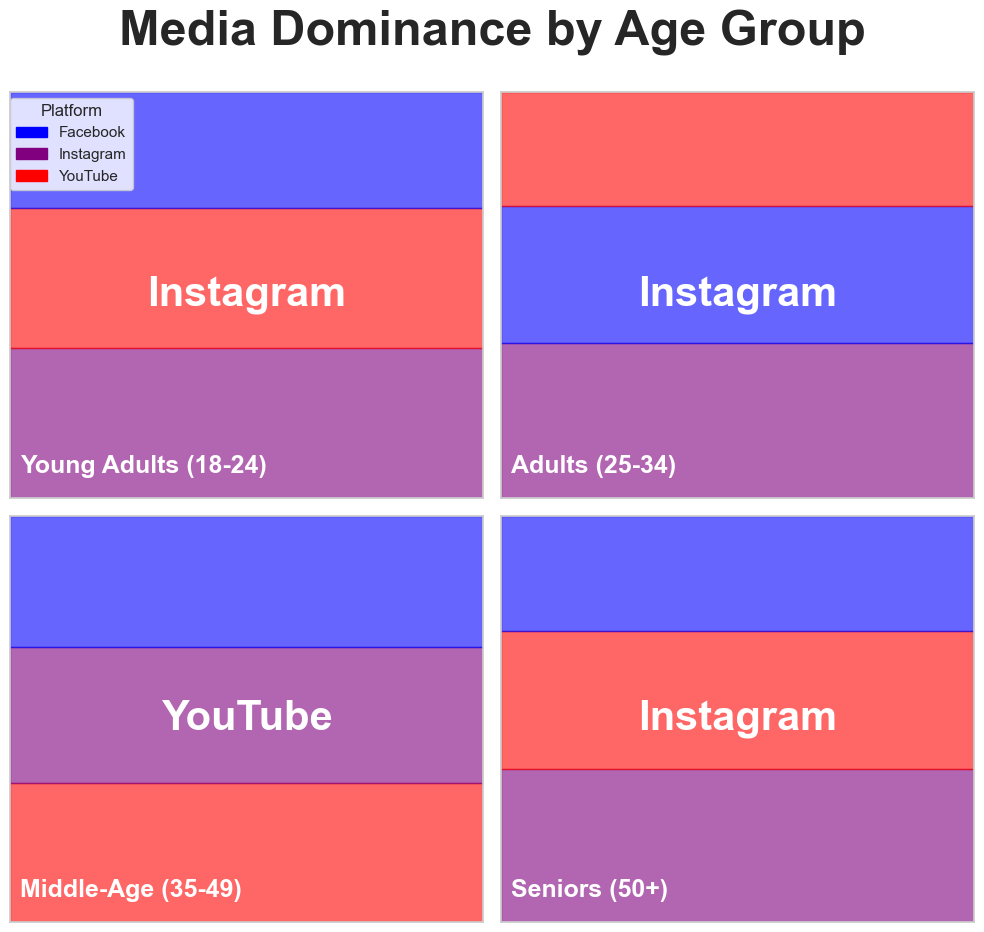

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

data = pd.read_csv('datasets/InternetUsage/internet_usage.csv')

# range of age groups
age_groups = {
    'Young Adults (18-24)': (18, 24),
    'Adults (25-34)': (25, 34),
    'Middle-Age (35-49)': (35, 49),
    'Seniors (50+)': (50, 100)
}

# calculating the proportion of users for each platform in each age group
platform_proportions = {}
for age_group, (age_min, age_max) in age_groups.items():
    group_data = data[(data['age'] >= age_min) & (data['age'] <= age_max)]
    platform_proportions[age_group] = group_data['platform'].value_counts(normalize=True)

# colors for the platforms as per their id palette
colors = {
    'Facebook': 'blue',
    'Instagram': 'purple',
    'YouTube': 'red'
}

# labels for the age groups
labels = ['Young Adults (18-24)', 'Adults (25-34)', 'Middle-Age (35-49)', 'Seniors (50+)']

# main title and fixed titles within each square
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, figure=fig)

# defining positions for the age groups
positions = {
    'Young Adults (18-24)': gs[0, 0],
    'Adults (25-34)': gs[0, 1],
    'Middle-Age (35-49)': gs[1, 0],
    'Seniors (50+)': gs[1, 1]
}

# plotting each age group
for age_group, pos in positions.items():
    ax = fig.add_subplot(pos)
    
    # plotting sections
    start = 0
    for platform, proportion in platform_proportions[age_group].items():
        end = start + proportion
        rect = plt.Rectangle((0, start), 1, end - start, color = colors[platform], alpha = 0.6, label = platform)
        ax.add_patch(rect)
        start = end
    
    # finding dominant platform per section in age group
    dominant_platform = platform_proportions[age_group].idxmax()
    
    # place dominant media name in the center & adjusting title
    ax.text(0.5, 0.5, dominant_platform, transform = ax.transAxes, fontsize = 30, color = 'white', ha = 'center', va = 'center', fontweight = 'bold')
    ax.text(0.02, 0.05, age_group, transform = ax.transAxes, va = 'bottom', ha = 'left', fontsize = 18, color = 'white', weight = 'bold')
    
    # remove x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])

# adding a legend
legend_handles = [
    mpatches.Patch(color = colors['Facebook'], label = 'Facebook'),
    mpatches.Patch(color = colors['Instagram'], label = 'Instagram'),
    mpatches.Patch(color = colors['YouTube'], label = 'YouTube')
]
fig.legend(handles = legend_handles, title = 'Platform', loc = 'upper left', bbox_to_anchor = (0.01, 0.9))

# main title
plt.suptitle('Media Dominance by Age Group', fontsize = 35, fontweight = 'bold')
plt.tight_layout(rect = [0, 0.05, 1, 0.98])

plt.show()


### Learning Objective 03



#### Figure 07. Raw Unstructured Data of Internet Usage Dataset

In [2]:
import pandas as pd

data = pd.read_csv('datasets/InternetUsage/internet_usage.csv')

# display the first few rows of the DF
data.head(5)


,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,64,non-binary,7,Instagram,Lifestlye,Australia,Sub_Urban,Software Engineer,12658,True,True,False
1,64,male,1,Facebook,Travel,United States,Urban,Marketer Manager,10501,False,False,False
2,64,non-binary,4,Instagram,Lifestlye,United States,Rural,Marketer Manager,18880,True,True,True
3,64,male,4,Instagram,Travel,United Kingdom,Urban,Marketer Manager,12823,False,False,True
4,64,male,6,Instagram,Lifestlye,United States,Rural,Student,14760,False,False,False


#### Figure 08. Filtering Dataset to Gender, Interests, and Platform
#### Figure 09. Filtering by Gender and Interests

In [3]:
filtered_data = data[['gender', 'interests', 'platform']]
print(filtered_data.head(5))

# filtering only females on Instagram
filtered_instagram_females = data[(data['gender'] == 'female') & (data['platform'] == 'Instagram')]

# grouping by 'interests' and count the occurrences
aggregated_data = filtered_instagram_females['interests'].value_counts().reset_index()
aggregated_data.columns = ['Interests', 'Count']

# display the aggregated data
print('\n\nFemale interests on Instagram:\n')
print(aggregated_data)


       gender  interests   platform
0  non-binary  Lifestlye  Instagram
1        male     Travel   Facebook
2  non-binary  Lifestlye  Instagram
3        male     Travel  Instagram
4        male  Lifestlye  Instagram


Female interests on Instagram:

   Interests  Count
0  Lifestlye     53
1     Sports     48
2     Travel     34


#### Figure 10. Bar Chart to demonstrate Female Preferences to Browse

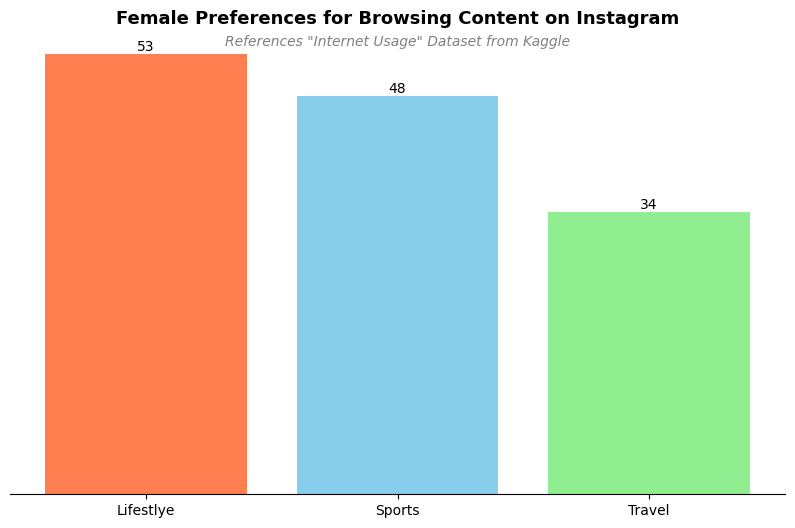

In [4]:
import matplotlib.pyplot as plt

# defining colors for each bar
colors = [ 'coral', 'skyblue', 'lightgreen']

# bar chart to visualise the interests
plt.figure(figsize = (10, 6))
bars = plt.bar(aggregated_data['Interests'], aggregated_data['Count'], color=colors[:len(aggregated_data['Interests'])])

# text annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha = 'center', va = 'bottom')

# adjusting the axis and grid
plt.title('Female Preferences for Browsing Content on Instagram', fontweight = 'bold', fontsize = 13)

# adding a description underneath the title
plt.text(0.5, 0.98, 'References "Internet Usage" Dataset from Kaggle', horizontalalignment = 'center', 
         verticalalignment = 'center', transform = plt.gca().transAxes, fontsize = 10, style = 'italic', color = 'grey')



plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_yticks([])  # remove y-axis tick labels

plt.show()


### Learning Objective 04

#### Figure 11. Comparison on League of Legends Champions Health and Mana

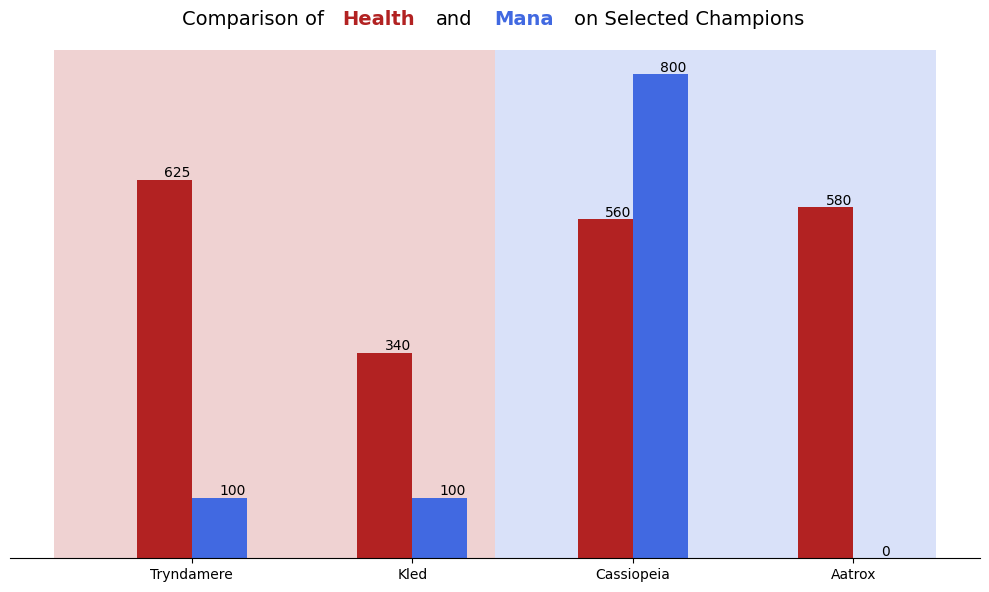

In [10]:
import pandas as pd

file_path = 'datasets/LeagueOfLegends/champions.csv'
data = pd.read_csv(file_path)

# taking Champion Name, Base Health, and Base Mana columns
data = data[['Champion Name', 'Base Health', 'Base Mana']]

# finding champions with the highest and lowest health and mana
highest_health = data.loc[data['Base Health'].idxmax()]
lowest_health = data.loc[data['Base Health'].idxmin()]
highest_mana = data.loc[data['Base Mana'].idxmax()]
lowest_mana = data.loc[data['Base Mana'].idxmin()]

# combining these into a single DF
comparison_data = pd.DataFrame([highest_health, lowest_health, highest_mana, lowest_mana])
comparison_data = comparison_data.reset_index(drop = True)

# data for plotting
champions = comparison_data['Champion Name']
health = comparison_data['Base Health']
mana = comparison_data['Base Mana']

# creating the bar plot
fig, ax = plt.subplots(figsize = (10, 6))

# adding background colours
ax.axvspan(-0.5, 1.5, facecolor = 'firebrick', alpha = 0.2)
ax.axvspan(1.5, 3.5, facecolor = 'royalblue', alpha = 0.2)

# plotting health and mana beside each other
bar_width = 0.25
indices = range(len(champions))

bars_health = ax.bar(indices, health, width=bar_width, label = 'Base Health', align = 'center', color = 'firebrick')
bars_mana = ax.bar([i + bar_width for i in indices], mana, width = bar_width, label = 'Base Mana', align = 'center', color = 'royalblue')

# adding the values on top of each bar
for bar in bars_health:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va = 'bottom')  # vertical alignment

for bar in bars_mana:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va = 'bottom') 

# removing y-axis and grid
ax.yaxis.set_visible(False)
ax.grid(False)

# adding labels and title
ax.set_xticks([i + bar_width / 2 for i in indices])
ax.set_xticklabels(champions)

# adding colored title parts
plt.text(0.25, 1.05, 'Comparison of', fontsize = 14, ha = 'center', transform=ax.transAxes)
plt.text(0.38, 1.05, 'Health', fontsize = 14, fontweight = 'bold', color = 'firebrick', ha = 'center', transform = ax.transAxes)
plt.text(0.458, 1.05, 'and', fontsize = 14, ha = 'center', transform = ax.transAxes)
plt.text(0.53, 1.05, 'Mana', fontsize = 14, fontweight = 'bold', color = 'royalblue', ha = 'center', transform = ax.transAxes)
plt.text(0.7, 1.05, 'on Selected Champions', fontsize = 14, ha = 'center', transform = ax.transAxes)

# removing the grid except for the bottom
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


### Learning Objective 05

#### Figure 12. Updated Version of Figure 02

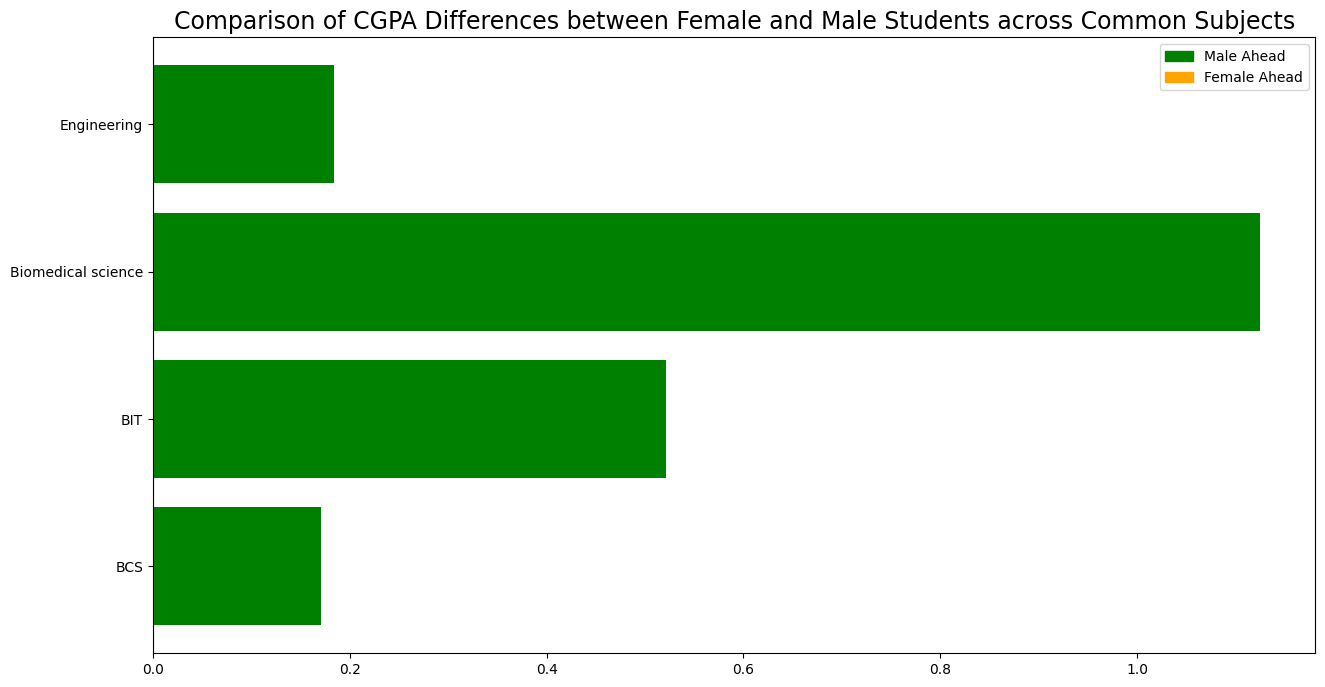

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/StudentsMentalHealth/stud_men_health.csv')

# parsing CGPA ranges
def parse_cgpa_range(cgpa_range):
    b = cgpa_range.strip().split('-')
    if len(b) == 2:
        return (float(b[0]) + float(b[1])) / 2
    return float(b[0])

# column for average
df['avg'] = df['What is your CGPA?'].apply(parse_cgpa_range)

# calculating the average per gender and course
avg_per_sub_gen = df.groupby(['Choose your gender', 'What is your course?']).agg({'avg': 'mean'}).reset_index()

# pivot table
table = avg_per_sub_gen.pivot(index = "What is your course?", columns = "Choose your gender", values = "avg")

# filtering out courses with data for both genders only
table = table.dropna()

# calculating the differences in CGPA
table['Difference'] = table['Female'] - table['Male']

# determine colours based on the difference
colours = ['orange' if diff < 0 else 'green' for diff in table['Difference']]

# plotting bar chart
plt.figure(figsize = (15, 8))
bars = plt.barh(table.index, table['Difference'], color = colours)

# adding title
plt.title('Comparison of CGPA Differences between Female and Male Students across Common Subjects', fontsize = 17)
plt.axvline(0, color='grey', linewidth=0.8) 

# adding legend
legend_labels = ['Male Ahead', 'Female Ahead']
legend_handles = [plt.Rectangle((0,0),1,1, color = 'green'), plt.Rectangle((0,0),1,1, color = 'orange')]
plt.legend(legend_handles, legend_labels)

plt.show()
